### Titanic Prediction dengan SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [2]:
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))

traindf = Readcsv('../input/train.csv')
testdf  = Readcsv('../input/test.csv')   

In [3]:
traindf.columns, testdf.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

Ada banyak kolom (fitur) dalam kumpulan data ini, sehingga memungkinkan untuk memecahnya.

**Survived**: Kondisi apakah orang itu selamat atau tidak.

**Pclass**: Kelas Passanger menunjukkan kelas orang tersebut di atas kapal.

**SibSp**: Menampilkan jumlah Sibling/Spouces yang mereka miliki.

**Parch**: Parch menunjukkan orang tua dengan anak-anak

**TIcket**: Nama/Nomor Tiket.

**Fare**: Berapa banyak Penumpang membayar.

**Cabin**: Nama kabin penumpang itu.

**Embarked**: Titik Embarkasi di mana *C* berarti Cherbourg, *Q* berarti Queenstown, *S* berarti Southampton.

In [4]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dapat dibedakan data tersebut menjadi dua grup:

**Categorical**: Dari kumpulan data dapat dilihat bahwa *Survived*, *Pclass*, *Sex*, *Embarked* dapat dikategorikan. Karena memiliki nilai diskrit seperti memiliki 0 atau 1.

**Continuous**: Dari kumpulan data dapat dilihat bahwa *Age* and *Fare* memiliki nilai yang dapat di **measured.**

In [5]:
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<h1><center>Exploratory Analysis</center></h1>

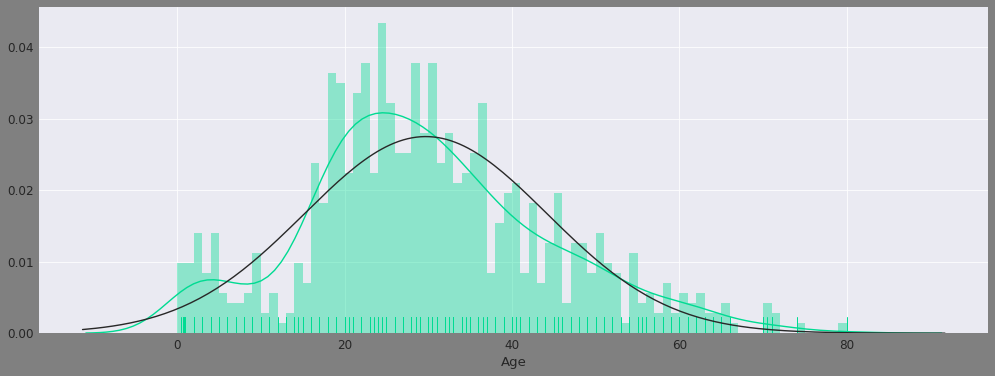

In [6]:
plt.figure(figsize = [17,6])
a = sns.distplot(traindf['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

Sebagian besar Penumpang kapal Titanic berada di kisaran 16 ~ hingga 40. Distribusi usia menunjukkan kurva bi-modal.

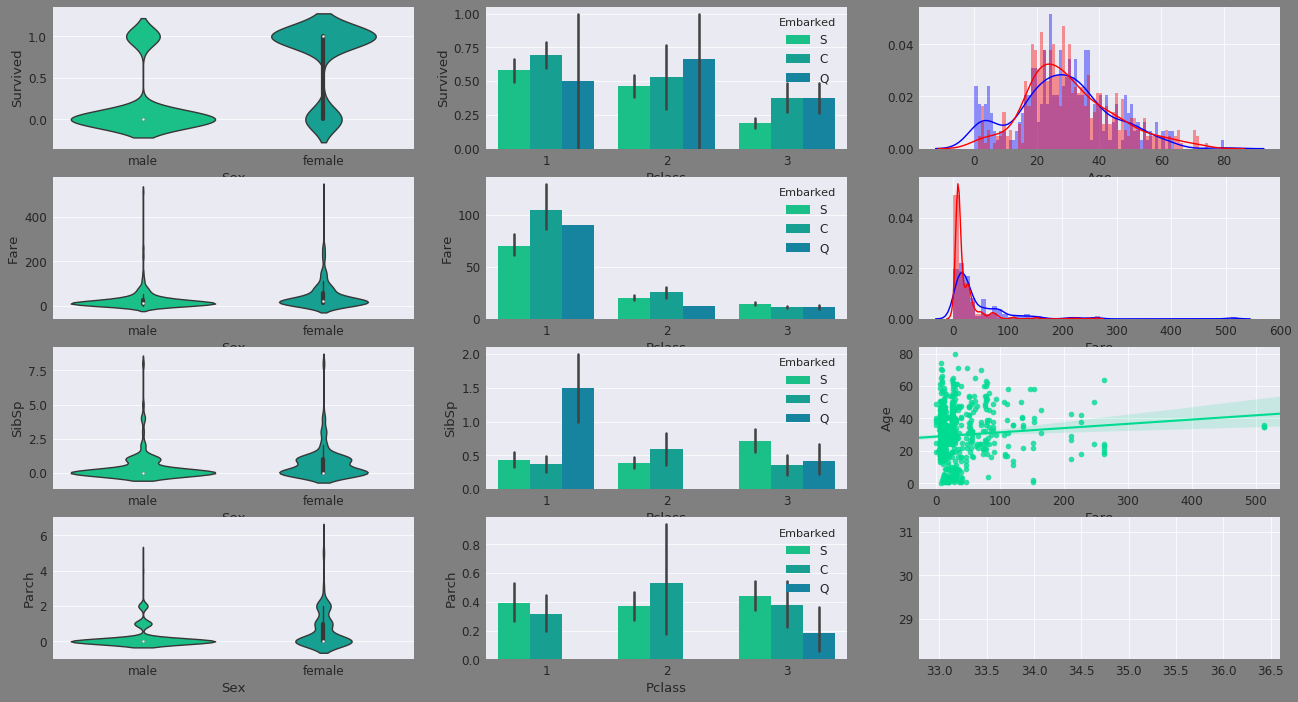

In [7]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = traindf , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(traindf[traindf['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(traindf[traindf['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = traindf, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = traindf, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = traindf, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

**1.** Mulai dari grafik pertama, dapat dilihat bahwa sangat sedikit laki-laki yang selamat dibandingkan dengan perempuan dan sangat sedikit perempuan yang meninggal dalam perbandingan dengan laki-laki.

**2.** Kelas satu dan kedua memiliki tingkat kelangsungan hidup paling banyak daripada kelas ketiga sedangkan pessangers yang naik dari *'S'* memiliki tingkat kelangsungan hidup paling sedikit.

**3.** Distribusi *biru* dan *merah* menunjukkan apakah pessanger selamat atau tidak.

**4. & 5.** Ada banyak penumpang dari kedua kategori yang tidak membayar apa pun untuk naik ke kapal terutama dari kelas **third** 

**6.** Pembagian Tarif sehubungan dengan Survival *blue* menunjukkan Survived sementara *red* menunjukkan kematian.

**7. & 8.** Ada lebih banyak *perempuan* SibSp (saudara kandung dan spouces) dibandingkan dengan *laki-laki* dan sebagian besar dari mereka berasal dari kelas **Pertama** dari stasiun *Q* diikuti oleh kelas **third**.

**9.** Distribusi Tarif berdasarkan usia menunjukkan bahwa ada banyak penumpang yang tidak membayar mayoritas sementara beberapa membayar lebih dari 500!

**10. & 11.** Dengan melihat grafik dapat dilihat bahwa itu mirip dengan SibSp sampai batas tertentu dengan satu-satunya perbedaan bahwa *Parch* diratakan dan plot bar mengatakan bahwa *Parch* tidak ada Penumpang dari *Q* di atas kapal sebagai kelas *1st* dan *2nd*.


In [8]:
traindf[traindf['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Dapat dilihat bahwa mereka yang membayar tertinggi memiliki nama tiket yang sama.

In [9]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum())    

In [10]:
get_isnull(traindf,testdf)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64, Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

Ada banyak nilai yang hilang yang ada di kedua set data yang tidak baik untuk model.

In [11]:
#function for concatation so that we won't have to repeat them again and again in future.
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [12]:
#Function for separation so that we won't have to repeat them again.
def saperate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [13]:
testdf[testdf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median digunakan alih-alih untuk rata-rata sehingga nilainya tidak bergeser terlalu banyak dalam direction.

In [14]:
def filling(data1,data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = filling(traindf, testdf)
#testdf = filling(testdf)


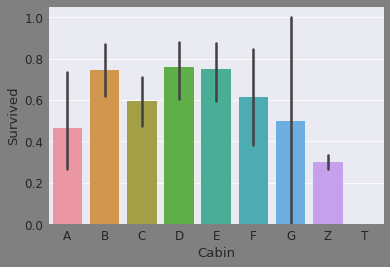

In [15]:
sns.barplot(x= 'Cabin', y = 'Survived', data = traindf ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [16]:
def pew(data1, data2):
    data = combine(data1,data2)
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = pew(traindf,testdf)
#testdf  = pew(testdf)

Lebih baik menggabungkan SibSp dan Parch karena mereka dapat diwakili sebagai keluarga.

In [17]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = family(traindf, testdf)
#testdf  = family(testdf)


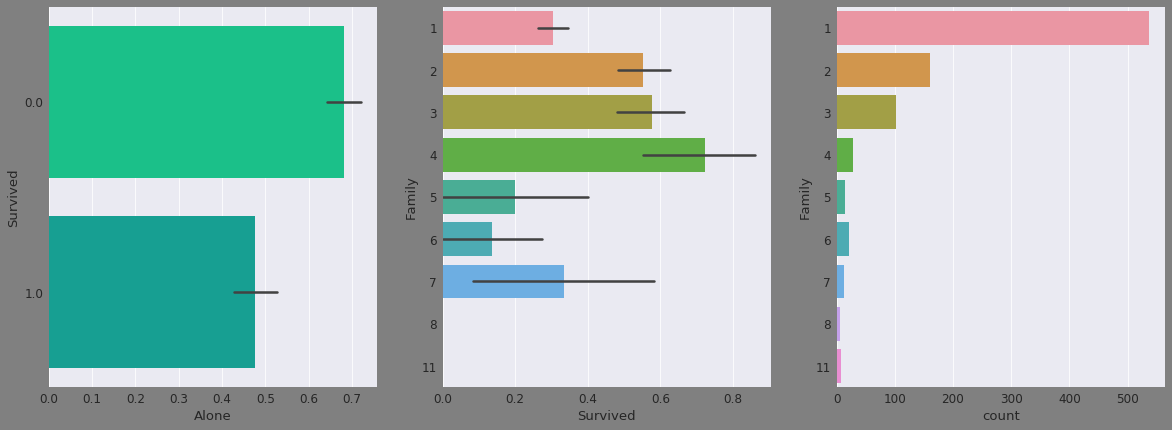

In [18]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = traindf,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = traindf,orient = 'h', ax = ax[1])
sns.factorplot(y = 'Family',data = traindf, kind = 'count', orient = 'h', ax = ax[2])
plt.close(2)
plt.close(3)

Sebagian besar penumpang sendirian. Para penumpang yang sendirian memiliki tingkat kelangsungan hidup yang lebih rendah yang juga berlaku untuk penumpang yang memiliki lebih dari 4 anggota.

In [19]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone
PassengerId,,,,,,,,,,,
1,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,A/5 21171,2,0
2,38.0,M,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,PC 17599,2,0
3,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,STON/O2. 3101282,1,1
4,35.0,M,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,113803,2,0
5,35.0,X,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,373450,1,1


In [20]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = FamilyGroup(traindf, testdf)
#testdf  = FamilyGroup(testdf) 

In [21]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = mapping(traindf, testdf)
#testdf  = mapping(testdf)

In [22]:
traindf['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [23]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup
PassengerId,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A/5 21171,2,0,2.0,3
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC 17599,2,0,2.0,1
3,26.0,X,2,7.9250,"Heikkinen, Miss. Laina",3,0,1.0,STON/O2. 3101282,1,1,1.0,3
4,35.0,M,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,0,2.0,1
5,35.0,X,2,8.0500,"Allen, Mr. William Henry",3,1,0.0,373450,1,1,1.0,3


In [24]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    #data['TitleGroup'] = data['TitleGroup'].replace({'male':1,'female':0,'Special':2})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Titles(traindf, testdf)
#testdf  = Titles(testdf)
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

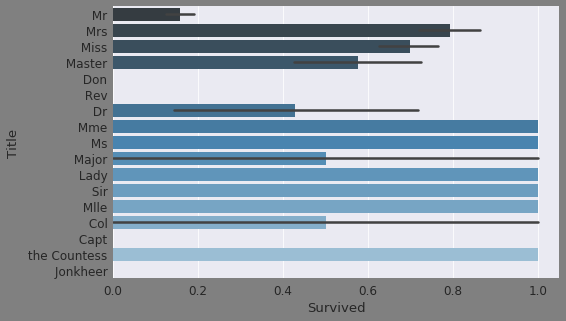

In [25]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = traindf, palette = 'Blues_d',)

In [26]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf

traindf, testdf = surname(traindf, testdf)


In [27]:
traindf.loc[traindf['Ticket'].str.contains('113803')]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,35.0,M,2,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,0,2.0,1,Mrs,1,Futrelle,2
138,37.0,M,2,53.1,"Futrelle, Mr. Jacques Heath",1,1,0.0,113803,2,0,2.0,1,Mr,2,Futrelle,2


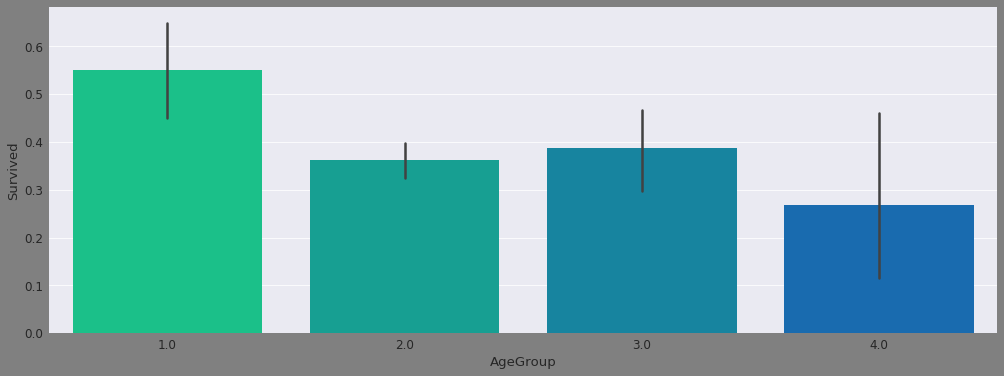

In [28]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Age']].round()
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    #data['AgeGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = age_distribution(traindf, testdf)
#testdf = age_distribution(testdf)
plt.figure(figsize = [17,6])
sns.barplot(x = traindf['AgeGroup'], y = traindf['Survived'])#data = traindf,)#ci = 95, orient = 'v')
plt.rc('xtick',labelsize = 12)

In [29]:
traindf.head(2)

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A/5 21171,2,0,2.0,3,Mr,2,Braund,2,2.0
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC 17599,2,0,2.0,1,Mrs,1,Cumings,2,2.0


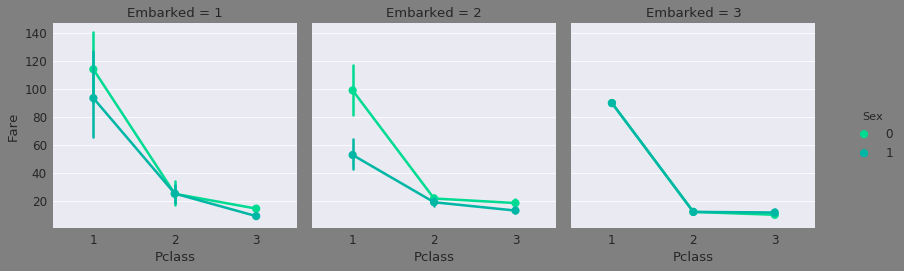

In [30]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = traindf, margin_titles = True)

Ada banyak perbedaan untuk *1st* dan *2nd* Embarkation untuk *1st* dan *3rd* Pclass dalam hal fare untuk pria dan wanita sedangkan fare kelas *2* mirip di semua Embarkation.

In [31]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = SharedSurname(traindf, testdf)
#testdf  = SharedSurname(testdf)

In [32]:
testdf.head(3)

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
892,34.5,X,3,7.8292,"Kelly, Mr. James",3,1,NaN,330911,1,1,1.0,3,Mr,2,Kelly,5,2.0
893,47.0,X,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",3,0,NaN,363272,2,0,2.0,3,Mrs,1,Wilkes,1,3.0
894,62.0,X,3,9.6875,"Myles, Mr. Thomas Francis",2,1,NaN,240276,1,1,1.0,3,Mr,2,Myles,1,4.0


Mengelompokkan Fare dan membuat kolom baru yang disebut *'FareGroup'* dengan caranya oleh Pclass

In [33]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf
#payment = fulldf.groupby('Pclass')['Fare'].mean()
traindf, testdf = fare_distribution(traindf, testdf)
#testdf = fare_distribution(testdf)


In [34]:
#pd.get_dummies(traindf,columns = (['Pclass','Sex','Age','Fare','Embarked','Family','Alone','Title']), drop_first = True)

In [35]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Tickets(traindf, testdf)
#testdf = Tickets(testdf)

In [36]:
traindf.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Pclass', 'Sex', 'Survived',
       'Ticket', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [37]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A521171,2,...,2.0,3,Mr,2,Braund,2,2.0,1,1,7
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC17599,2,...,2.0,1,Mrs,1,Cumings,2,2.0,3,2,7
3,26.0,X,2,7.9250,"Heikkinen, Miss. Laina",3,0,1.0,STONO23101282,1,...,1.0,3,Miss,1,Heikkinen,1,2.0,1,1,13
4,35.0,M,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,...,2.0,1,Mrs,1,Futrelle,2,2.0,3,2,6
5,35.0,X,2,8.0500,"Allen, Mr. William Henry",3,1,0.0,373450,1,...,1.0,3,Mr,2,Allen,2,2.0,1,1,6


In [38]:
X = traindf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = traindf['Survived']
X.shape , y.shape

((891, 11), (891,))

In [39]:
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

# Correlation

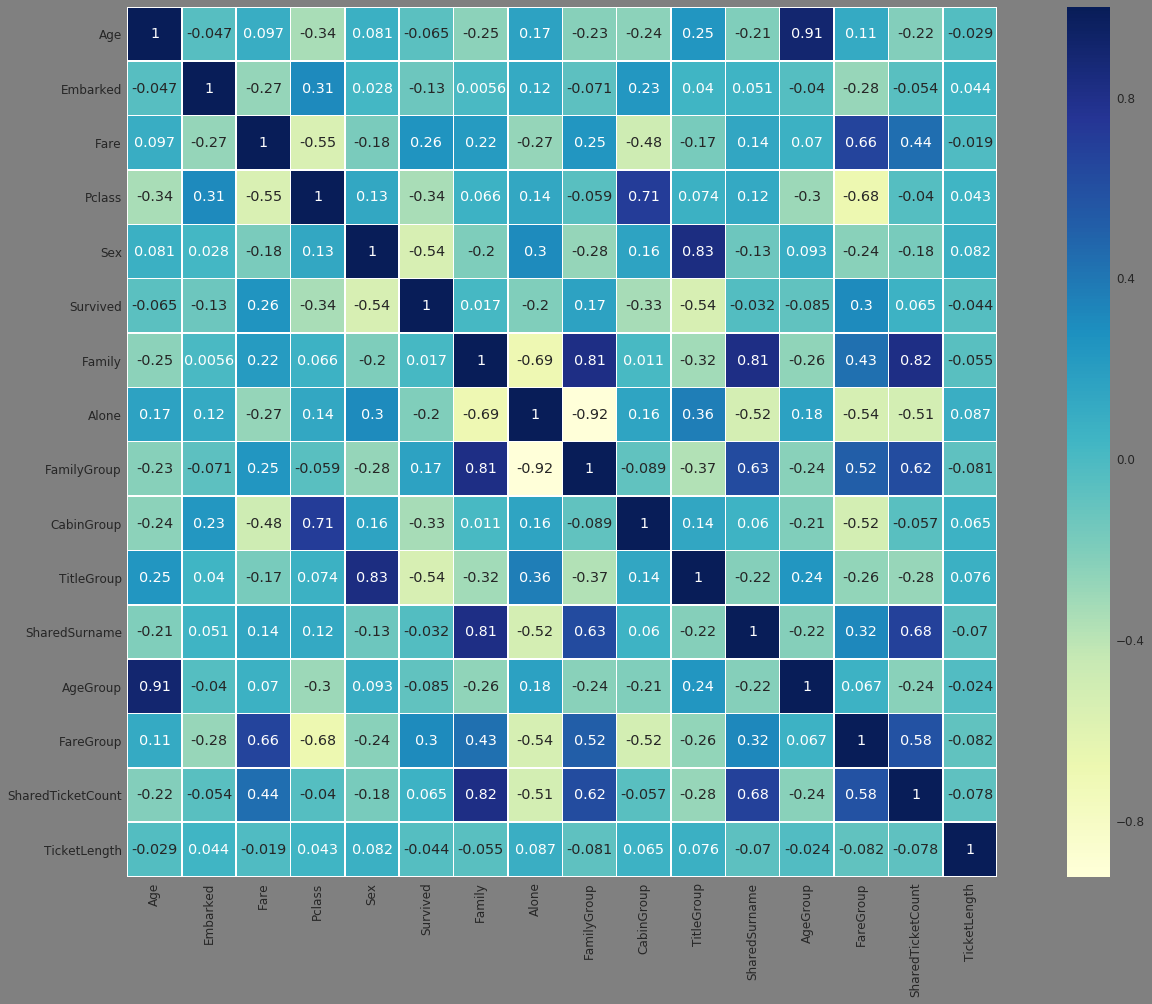

In [40]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

Karena fitur kategoris telah dibuat dari fitur yang ada dalam set data hanya mengambil kategoris untuk melatih model.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

In [42]:
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

In [43]:
npX = np.array(X).copy()
npy = np.array(y).copy()

<h1><center>Models</center></h1>

In [44]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [45]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [46]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [47]:
mode

,score
XGBoost,0.836126
SVM,0.831657
RandomForest,0.824978
Bagging,0.823829
AdaBoost,0.818211
ExtraTrees,0.817150
DecisionTree,0.805888
LogisticRegression,0.805825


Memilih 3 pengklasifikasi teratas untuk prediksi model.

In [48]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}


In [49]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [50]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

0.842873176207


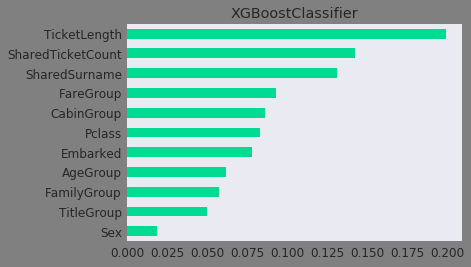

In [51]:
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg)
print(best_score_xg)
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

0.841750841751


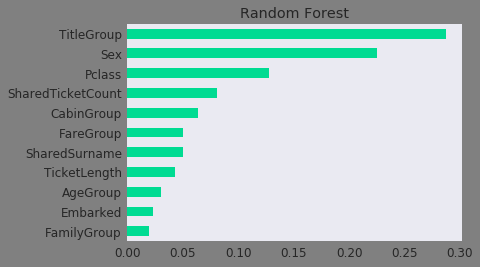

In [52]:
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf)
print(best_score_rf)
imp_features(RandomForestClassifier,'Random Forest', best_params_rf)

In [53]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

0.833894500561


Visualisasikan batas keputusan untuk melihat apakah model overfitting atau tidak tetapi jumlah fitur dalam kumpulan data yang digunakan adalah 7+ sehingga harus mengurangi dimensi ke 2 untuk dapat memvisualisasikan, dalam hal ini PCA digunakan untuk pengurangan dimensi.

<h1><center>Decision Boundary Visualization</center></h1>

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [55]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

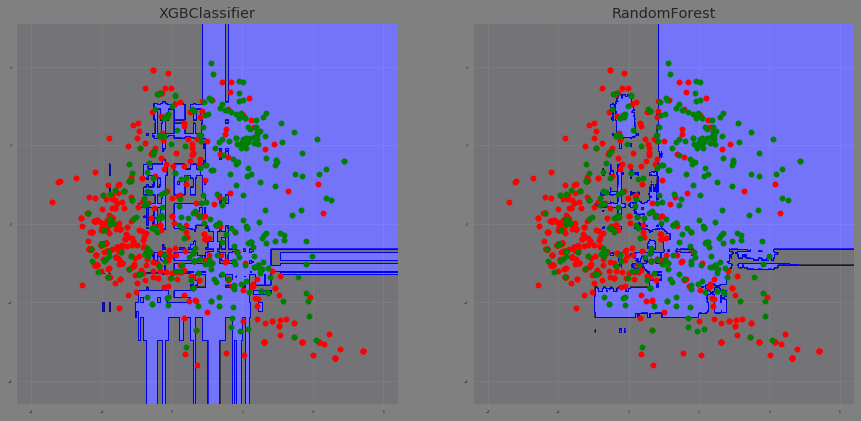

In [56]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(1,2,1)
plt.title('XGBClassifier')
boundaries(XGBClassifier,'eXtreme Boosting Classifier', best_params_xg)


ax = plt.subplot(1,2,2)
plt.title('RandomForest')
boundaries(RandomForestClassifier, 'Random Forest', best_params_rf)

Grafik di atas dengan jelas menunjukkan bahwa model sedikit terlalu cocok, karenanya kinerjanya akan buruk pada set pengujian. Lihat batas keputusan model SVM dengan **mlxtend** library.

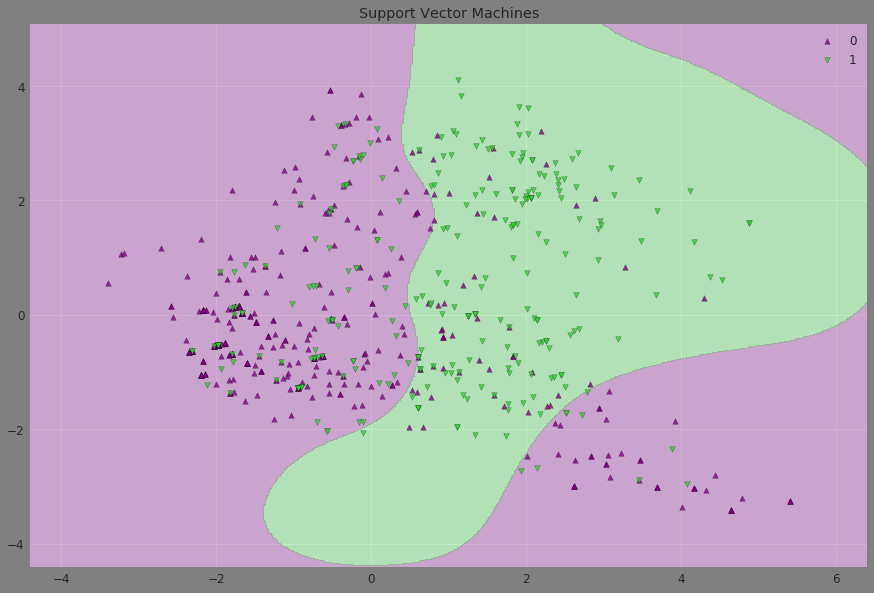

In [57]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.integer)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [58]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
testdf = testdf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
nptest = np.array(testdf)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['Survived'])
predictions.to_csv('predictions_svm_with_groups.csv')

Konsep SVM dapat dijelaskan secara sederhana sebagai usaha mencari hyperplane-hyperplane terbaik yang berfungsi sebagai pemisah dua buah class pada input space.
Diasumsikan kedua class –1 dan +1 dapat terpisah secara sempurna oleh hyperplane berdimensi d, yang didefinisikan:
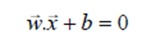

Pattern i xr yang termasuk class –1 (sampel negatif) dapat dirumuskan sebagai pattern yang memenuhi pertidaksamaan:
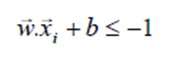

sedangkan pattern i xr yang termasuk class +1 (sampel positif)
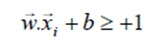

Margin terbesar dapat ditemukan dengan memaksimalkan nilai jarak antara hyperplane dan titik terdekatnya, yaitu w r 1/ . 
Hal ini dapat dirumuskan sebagai Quadratic Programming (QP) problem, yaitu mencari titik minimal persamaan 
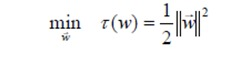

dengan memperhatikan constraint persamaan
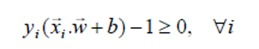


## Sumber

https://www.kaggle.com/l3r4nd/titanic-prediction-with-svm